In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
color_list =["#3eb991","#e9a820","#e01563","#edb196","#6ecadc","#1f94ac","#ae9a6a","#ccb8a6","#343a44"]
import csv

In [58]:
# walk2d_df = pd.DataFrame(pd.read_csv("../data_files/randomwalk2d.csv", index_col=0, header=None))
df = pd.DataFrame(pd.read_csv("../data_files/targetedwalk2d.csv"))
print(df)

           x        y
0    499.000  499.000
1    496.139  499.088
2    496.047  496.345
3    496.433  495.838
4    495.679  497.256
..       ...      ...
995 -336.124 -399.578
996 -337.145 -400.603
997 -337.731 -401.231
998 -336.601 -400.245
999 -337.006 -399.711

[1000 rows x 2 columns]


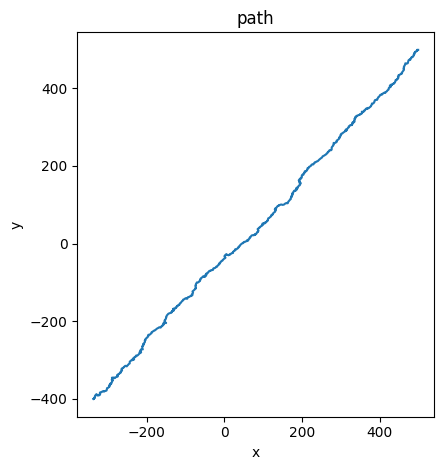

In [59]:
fig, ax = plt.subplots()

x = df["x"]
y =  df["y"]

t = "path"
# plt.plot(x,y, marker='o', ms=1, linestyle='None')
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
ax.set_title(t)
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()

1000
-337.006
{'r_squared': 0.9988297825719727}


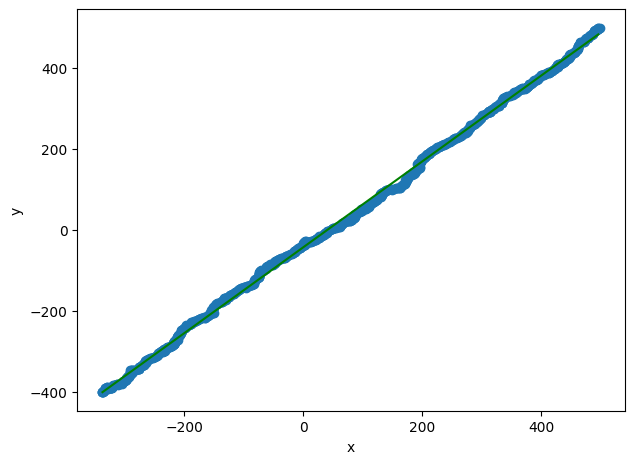

In [60]:
t = "path"
plt.xlabel('x')
plt.ylabel('y')
ax.set_title(t)
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()

model1 = np.poly1d(np.polyfit(df.x, df.y, 1))

polyline = np.linspace(x[1], x[[len(x)-1]], len(x))
print(len(x))
print(x[len(x)-1])

plt.scatter(df.x, df.y)

plt.plot(polyline, model1(polyline), color='green')

def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

#calculated adjusted R-squared of each model
print(adjR(df.x, df.y, 1))